**Titanic Disaster Survival Using Logistic Regression**

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
print("lenght of the data: ",len(data))
print("The Indexes of the data: ",data.index)
print()
print("The Column name od the Data: ")
data.columns

lenght of the data:  891
The Indexes of the data:  RangeIndex(start=0, stop=891, step=1)

The Column name od the Data: 


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
print("--   The more Informations about the Data:  ")
print()
data.info()

--   The more Informations about the Data:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
print("the types of Data: ")
print()
data.dtypes

the types of Data: 



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [50]:
print("The Important Statistical Meassurements for the Data: ")
print()
data.describe()

The Important Statistical Meassurements for the Data: 



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Explaining Dataset**

**survival** : Survival 0 = No, 1 = Yes

**pclass** : Ticket class 1 = 1st, 2 = 2nd **3** = 3rd

**sex** : Sex

**Age** : Age in years
**sibsp** : Number of siblings / spouses aboard the Titanic

parch # of parents / children aboard the Titanic

**ticket** : Ticket number fare Passenger fare cabin Cabin number

**embarked** : Port of Embarkation **C** = Cherbourg, **Q** = Queenstown, **S** = Southampton

**DATA ANALYSIS:**

Both Male and Female Survival Ratio


<Axes: xlabel='Survived', ylabel='count'>

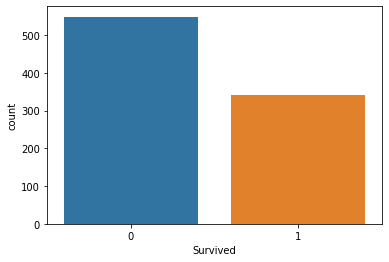

In [51]:
print("Both Male and Female Survival Ratio")
sns.countplot(x="Survived",data=data)

Male and Female Survival Comparison: 


<Axes: xlabel='Survived', ylabel='count'>

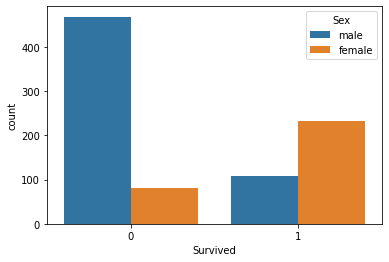

In [52]:
print("Male and Female Survival Comparison: ")
sns.countplot(x="Survived",data=data,hue='Sex')

In [53]:
print("Checking for if there is a null values or not: ")
print("If there is a 'TRUE' that means there is a null value, not otherwise")
print()
data.isna()

Checking for if there is a null values or not: 
If there is a 'TRUE' that means there is a null value, not otherwise



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
print("Checking how many values are null: ")
print()
data.isna().sum()

Checking how many values are null: 



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Visualizig the null values: 



<Axes: >

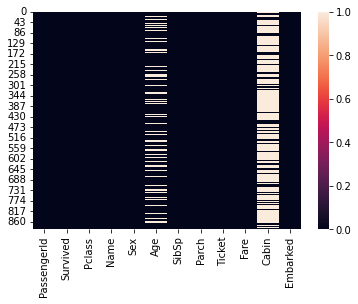

In [55]:
print("Visualizig the null values: ")
print()
sns.heatmap(data.isna())

In [56]:
print("Now we will see how much null values are there in the respected columns")
print("If there are more then 30% of null values then will erase the column")
print()
print()
print("Total precentage of null values in the column Age: ",(((data['Age'].isna().sum())/len(data['Age']))*100),'%')
print()
print("Total precentage of null values in the column Cabin: ",(((data['Cabin'].isna().sum())/len(data['Cabin']))*100),'%')
print()

Now we will see how much null values are there in the respected columns
If there are more then 30% of null values then will erase the column


Total precentage of null values in the column Age:  19.865319865319865 %

Total precentage of null values in the column Cabin:  77.10437710437711 %



Distribution of the Age column



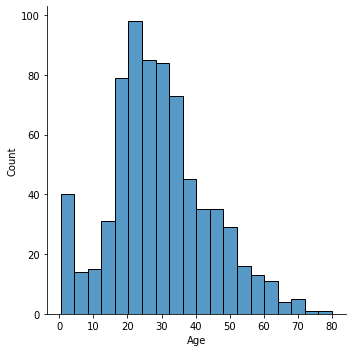

In [57]:
print("Distribution of the Age column")
print()
sns.displot(x='Age',data=data)

**Data Cleaning**

In [58]:
# Now, we will fill the null value
# firstly, calculating the mean of the column

age_mean = data["Age"].mean()
print("Mean of column Age:",age_mean)

# Now, where ever there is null values in this column we will impute the null values with the mean
data['Age'].fillna(age_mean,inplace=True)
print()
# Verifying
print("Verifying if there is any null values --->")
data.isna().sum()

Mean of column Age: 29.69911764705882

Verifying if there is any null values --->


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
# as in the cabin column is containing veryu much null values so we will drop it
data.drop('Cabin',axis=1,inplace=True)

# see if it is removed
data.head() 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [60]:
# checking numeric or non-numeric columns

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

* Here, Name, Sex, Ticket and Embarked are non numeric.

* Name, Ticket, Embarked will not be useful for prediction.

* So, we will drop it.

* As for Sex we will convert these to numerical values **bold text**






In [61]:
# Converting Sex to numberical values

pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


* Hence, here both column is representing for to different types of values. 
* In male column, 1 presents that is male and vise versa

In [62]:
# We will remove one column as we can just just one column for our prediction.

pd.get_dummies(data['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


* Now, we will remove the Sex column from our respected data set and will add this dummies catagorical values to our Data set.

In [63]:
gender = pd.get_dummies(data['Sex'],drop_first=True)

data['Gender']=gender 

# verifying ...
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [64]:
data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

# verifying ...
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [65]:
# separeting Dependent variables and independent variables

x = data[["PassengerId","Pclass","Age","SibSp","Parch","Fare","Gender"]]
y = data[['Survived']]

In [66]:
print("Independent Variables")
x

Independent Variables


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [67]:
print("Dependent Variable")
y

Dependent Variables


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


**Data Modeling**

* Building Model using Logistic Regression
* Building the Model

In [71]:
# import train test split method
from sklearn.model_selection import train_test_split   

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)



In [72]:
# importing Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#fitting the eqn
lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
#prediction
predict = lr.predict(x_test)

**Testing**

In [76]:
# print confusion matrix

from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,37,83


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

